In [1]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
import tweepy as tw
import json as js
from tweepy import OAuthHandler
from timeit import default_timer as timer
import os
%matplotlib inline

## DATA GATHERING

> __1. First data - twitter-archive-enhanced__

In [2]:
#Lets read it into pandas DataFrame
df_one = pd.read_csv('twitter-archive-enhanced.csv')
df_one.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. __Second dataset - Image_predictions__ using the requests library

In [3]:
# creating a folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#creating the requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = rq.get(url)
r.status_code

200

In [5]:
#access the content and write to a file
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [6]:
#check the content
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
#Lets read it into pandas DataFrame
df_image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
df_image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


__3. Third Dataset - Tweet_json__ using tweepy library

In [ ]:
# Entering authentication keys to get access to the dataset needed
consumer_key = 'SECRET KEY'
consumer_secret = 'SECRET KEY'
access_token = 'SECRET KEY'
access_secret = 'SECRET KEY'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Assigning a variable to the tweet_id values which will be used in the extracting the needed data
tweet_ids = df_one.tweet_id.values
len(tweet_ids)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [ ]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            js.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepyException as error:
            print("Fail")
            fails_dict[tweet_id] = error
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
#Extracting twitter id, favourite_count, retweet_count from the .txt file
file1 = open('tweet_json.txt', 'r')
Lines = file1.readlines()
count = 0
i_d = []
like = []
retweet = []

for line in Lines:
    count += 1
    res = js.loads(line)
    i_d.append(res['id'])
    like.append(res['favorite_count'])
    retweet.append(res['retweet_count'])

In [9]:
# Converting the extracted twitter id, favorite_count, retweet_count to dataframe
additional_df = pd.DataFrame({'tweet_id': i_d,
                             'Favorite_count': like,
                              'Retweet_count': retweet
                             })

In [10]:
#Lets see the dataframe
additional_df

,tweet_id,Favorite_count,Retweet_count
0,892420643555336193,33807,7009
1,892177421306343426,29330,5301
2,891815181378084864,22051,3481
3,891689557279858688,36939,7225
4,891327558926688256,35311,7760
...,...,...,...
2320,666049248165822465,89,37
2321,666044226329800704,247,115
2322,666033412701032449,100,36
2323,666029285002620928,112,39


## ASSESSING THE DATASETS

### a. VISUAL ASSESSMENT

In [11]:
# lets visually assess the first dataset (df_one)
df_one

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
# lets visually assess the second dataset (df_image_predictions)
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
# lets visually assess the third dataset (additional_df)
additional_df

,tweet_id,Favorite_count,Retweet_count
0,892420643555336193,33807,7009
1,892177421306343426,29330,5301
2,891815181378084864,22051,3481
3,891689557279858688,36939,7225
4,891327558926688256,35311,7760
...,...,...,...
2320,666049248165822465,89,37
2321,666044226329800704,247,115
2322,666033412701032449,100,36
2323,666029285002620928,112,39


### b. PROGRAMMATIC ASSESSMENT

In [15]:
# lets get a general overview of the first dataset programmatically
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# lets get a general overview of the second dataset programmatically
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# lets get a general overview of the third dataset programmatically
additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   Favorite_count  2325 non-null   int64
 2   Retweet_count   2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [17]:
# Lets get the dimension of the first dataset
df_one.shape

(2356, 17)

In [18]:
# Lets get the dimension of the second dataset
df_image_predictions.shape

(2075, 12)

In [19]:
# Lets get the dimension of the third dataset
additional_df.shape

(2325, 3)

In [20]:
#lets see the sum of the null values in the first dataset
df_one.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
#lets see the sum of the null values in the second dataset
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
#lets see the sum of the null values in the third dataset
additional_df.isnull().sum()

tweet_id          0
Favorite_count    0
Retweet_count     0
dtype: int64

In [23]:
#lets see the number of unique values in the various column of the first dataset
df_one.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [24]:
#lets see the number of unique values in the various column of the second dataset
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [25]:
#lets see the number of unique values in the various column of the third dataset
additional_df.nunique()

tweet_id          2325
Favorite_count    1960
Retweet_count     1666
dtype: int64

In [26]:
#lets see if there are duplicated values in the first dataset
df_one.duplicated().sum()

0

In [27]:
#lets see if there are duplicated values in the second dataset
df_image_predictions.duplicated().sum()

0

In [28]:
#lets see if there are duplicated values in the third dataset
additional_df.duplicated().sum()

0

In [29]:
#lets see the columns in the first dataset
df_one.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [30]:
#lets see the columns in the second dataset
df_image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [31]:
#lets see the columns in the third dataset
additional_df.columns

Index(['tweet_id', 'Favorite_count', 'Retweet_count'], dtype='object')

In [32]:
#Lets sample the first dataset
df_one.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,None,None,None,None
154,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,13,10,None,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
486,814530161257443328,NaN,NaN,2016-12-29 17:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alf. Someone just rubbed a balloon on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814530161...,12,10,Alf,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933...,12,10,None,None,None,pupper,None
2099,670717338665226240,NaN,NaN,2015-11-28 21:34:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screams for a little bit and then crumples to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670717338...,12,10,None,None,None,None,None
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,None,None,None,None


In [33]:
#Lets sample the second dataset
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
1819,834209720923721728,https://pbs.twimg.com/media/C5O1UAaWIAAMBMd.jpg,1,golden_retriever,0.754799,True,Pekinese,0.197861,True,Labrador_retriever,0.008654,True
1946,862457590147678208,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,home_theater,0.496348,False,studio_couch,0.167256,False,barber_chair,0.052625,False
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1431,773247561583001600,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True
946,704499785726889984,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,Chihuahua,0.376541,True,Siamese_cat,0.098057,False,Labrador_retriever,0.085211,True
599,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,wallaby,0.164215,False,West_Highland_white_terrier,0.093515,True,ashcan,0.067278,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
196,669597912108789760,https://pbs.twimg.com/media/CUrjvxiVEAA94dH.jpg,1,Eskimo_dog,0.595665,True,Siberian_husky,0.214474,True,white_wolf,0.147235,False


In [34]:
#Lets sample the third dataset
additional_df.sample(10)

,tweet_id,Favorite_count,Retweet_count
1045,739844404073074688,3533,791
1472,692142790915014657,1515,355
491,811985624773361665,6918,1312
656,789280767834746880,0,4592
855,760521673607086080,3925,1288
2064,670764103623966721,958,371
284,836677758902222849,11863,2026
2242,667470559035432960,225,85
2212,667902449697558528,759,334
134,865006731092295680,25051,6675


### Quality issues
##### Twitter-Archive_Enhanced (df_one)
> 1. Columns with high amount of null can be categorized as low level information columns
> 2. Timestamp column is in object format instead of datetime format
> 3. The source columns need to be cleaned to present a more presentable values
> 4. Name column need to be changed to 'dog_name' as this is better for information purpose
> 5. tweet_id column is in int format instead of string format

##### df_image_predictions
> 6. The second and third likely prediction need to be dropped since they have low prediction rate
> 7. tweet_id column is in int format instead of string format

##### additional_df
> 8. tweet_id column is in int format instead of string format

### Tidiness issues
> 1. The various dog_stages in different columns can be collapsed into one column called 'dog_stage'.
> 2. The three dataframe have to be merged in order to attain the structural goal of only ratings with images.

## DATA CLEANING

In [35]:
# Make copies of original pieces of data
df_one_unclean = df_one.copy()
df_two_unclean = df_image_predictions.copy()
df_three_unclean = additional_df.copy()


 
 __QUality Issue #1__

> The following columns contain missing values > 90% ( in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp ). These columns won't be useful for our analysis.

##### Define:

> Remove the following columns ( in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, )

#### Code

In [36]:
# putting the columns to be dropped in a list
list_to_be_dropped = ['in_reply_to_status_id','in_reply_to_user_id', 
         'retweeted_status_id','retweeted_status_user_id',
         'retweeted_status_timestamp',]

# Drop the columns 
df_one_unclean.drop(list_to_be_dropped, axis=1, inplace=True)

In [37]:
# 'expanded_urls' column will be dropped since it wont be useful for our analysis
df_one_unclean.drop('expanded_urls', axis=1, inplace=True)

##### Test

In [38]:
#lets see if our cleaning effort worked
df_one_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


 __Quality Issue #2 and #5__

timestamp column is in object format instead of datetime format

tweet_id column is in int format instead of string format

#### Define:

convert the timestamp column from object to datetime format

convert the tweet_id column from int format to string format

#### Code

In [39]:
# Covert the timestamp and tweet_id column in df_one_unclean dataframe to datetime and string format respectively
df_one_unclean['timestamp'] = pd.to_datetime(df_one_unclean['timestamp'])

df_one_unclean['tweet_id'] = df_one_unclean['tweet_id'].astype(str)

#### Test

In [40]:
# Lets check if the cleaning effort worked
df_one_unclean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Quality issue #3
The source column need to be cleaned to present a more presentable values

#### Define
Extract a more presentable values from the source column

#### Code

In [41]:
#lets see the unique values in the source column
df_one_unclean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [42]:
#lets extract a more presentable values from the source column and append them into a list
source_list = []
for source in df_one_unclean.source.values:
    if source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        source_list.append('Twitter for iPhone')
    elif source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        source_list.append('Twitter Web Client')
    elif source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        source_list.append('Vine - Make a Scene')
    elif source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        source_list.append('TweetDeck')
    else:
        source_list.append(source)

In [43]:
#lets see the extract texts in the list
set(source_list)

{'TweetDeck',
 'Twitter Web Client',
 'Twitter for iPhone',
 'Vine - Make a Scene'}

In [44]:
#lets replace the source column with the exracted text
df_one_unclean['source'].replace({
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'},inplace =True)

##### Test

In [45]:
#lets see if our cleaning effort worked
df_one_unclean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


In [46]:
#lets see the counts of the various values in the source column
df_one_unclean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Quality issue #4
Name column need to be changed to 'dog_name' as this is better for information purpose

##### Define

Change the 'name' column to 'dog_name'

##### Code

In [47]:
# rename the 'name' column by 'dog_name'
df_one_unclean.rename({'name':'dog_name'}, axis= 1, inplace= True)
df_one_unclean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


#### Quality issue #6
The second and third likely prediction need to be dropped since they have low prediction rate(df_two_unclean)

##### Define
Drop the columns containing the second and third likely predictions in the df_image_predictions and also the jpg_url (df_two_unclean), since they wont be useful for our analysis.

##### Code

In [48]:
#Lets see the columns to be dropped
df_two_unclean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [49]:
#lets drop the columns
df_two_unclean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis =1, inplace = True)
df_two_unclean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


In [50]:
#lets also drop the 'jpg_url'
df_two_unclean.drop(['jpg_url'], axis =1, inplace = True)


##### Test

In [51]:
#Lets see if our cleaning effort worked
df_two_unclean.head(2)

,tweet_id,img_num,p1,p1_conf,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True


#### Quality issue #7
tweet_id column is in int format instead of string format

##### Define
convert the tweet_id column in df_two_unclean from int to string format

##### Code

In [52]:
#lets convert from int to str format
df_two_unclean['tweet_id'] = df_two_unclean['tweet_id'].astype(str)

##### Test

In [53]:
#lets see if our cleaning effort worked
df_two_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   img_num   2075 non-null   int64  
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 67.0+ KB


#### Quality_issue #8
tweet_id column is in int format instead of string format in the df_additional(df_three_unclean) dataset

##### Define
convert the tweet_id column in df_two_unclean from int to string format

##### Code

In [54]:
#lets convert from int to str format
df_three_unclean['tweet_id'] = df_three_unclean['tweet_id'].astype(str)

##### Test

In [55]:
#lets see if our cleaning effort worked
df_three_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   object
 1   Favorite_count  2325 non-null   int64 
 2   Retweet_count   2325 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


#### Tidiness issues #1
The various dog_stages in different columns can be collapsed into one column called 'dog_stage' in the df_one_unclean dataset.


##### Define

combine the various dog stages columns into one column called 'dog_stage'

##### Code

In [56]:
#lets see the first 4 rows
df_one_unclean.head(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None


In [57]:
# Handle 'None' entries first
df_one_unclean.doggo.replace('None', '', inplace=True)
df_one_unclean.floofer.replace('None', '', inplace=True)
df_one_unclean.pupper.replace('None', '', inplace=True)
df_one_unclean.puppo.replace('None', '', inplace=True)

# Merge into one column
df_one_unclean['dog_stage'] = df_one_unclean.doggo + df_one_unclean.floofer + df_one_unclean.pupper + df_one_unclean.puppo


In [58]:
#lets check the values in the new column (dog_stage)
df_one_unclean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [59]:
# Handle mutiple stages by separating them with comma
df_one_unclean.loc[df_one_unclean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df_one_unclean.loc[df_one_unclean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df_one_unclean.loc[df_one_unclean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'


#  Handle missing values by using np.nan to fill the empty spaces
df_one_unclean.loc[df_one_unclean.dog_stage == '', 'dog_stage'] = np.nan

In [60]:
# Drop the old columns
df_one_unclean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [61]:
#Lets check our cleaning efforts
df_one_unclean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [62]:
#lets also see the values in the dog_stage column
df_one_unclean.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

#### Tidiness issues #2
The three dataframe have to be merged in order to attain the structural goal of only ratings with images

##### Define
To attain the structural goal of only ratings with images, merging will have to be done


##### Code

In [63]:
#merge the first two datasets using tweet_id
df_combined_1 = pd.merge(df_two_unclean, df_one_unclean, on='tweet_id', how='left')

In [64]:
#lets see the combined dataset
df_combined_1.head(3)

,tweet_id,img_num,p1,p1_conf,p1_dog,timestamp,source,text,rating_numerator,rating_denominator,dog_name,dog_stage
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,NaN
1,666029285002620928,1,redbone,0.506826,True,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,NaN
2,666033412701032449,1,German_shepherd,0.596461,True,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,NaN


In [65]:
#merge df_combined_1 and df_three_unclean
df_combined_2 = pd.merge(df_combined_1, df_three_unclean, on='tweet_id', how='left')

##### Test

In [66]:
#lets check if our merging effort worked
df_combined_2.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'timestamp', 'source',
       'text', 'rating_numerator', 'rating_denominator', 'dog_name',
       'dog_stage', 'Favorite_count', 'Retweet_count'],
      dtype='object')

### Storing Data

__Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".__




In [67]:
# Saving the master dataset to a csv file
combined_data = df_combined_2.to_csv("twitter_archive_master.csv", index=False)

### Analyzing and Visualizing
__In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualizations.__

In [68]:
#Lets get the descriptive statistics of the dataset
df_combined_2.describe()

,img_num,p1_conf,rating_numerator,rating_denominator,Favorite_count,Retweet_count
count,2075.000000,2075.000000,2075.000000,2075.000000,2055.000000,2055.000000
mean,1.203855,0.594548,12.266024,10.511325,7435.322628,2359.421411
std,0.561875,0.271174,40.680299,7.177072,11255.353409,4128.421076
min,1.000000,0.044333,0.000000,2.000000,0.000000,11.000000
25%,1.000000,0.364412,10.000000,10.000000,1412.500000,501.500000
50%,1.000000,0.588230,11.000000,10.000000,3257.000000,1114.000000
75%,1.000000,0.843855,12.000000,10.000000,9261.000000,2715.500000
max,4.000000,1.000000,1776.000000,170.000000,144890.000000,70738.000000


In [69]:
#lets get the  value counts of the dog_stage
df_combined_2.dog_stage.value_counts()

pupper           211
doggo             67
puppo             23
doggo,pupper      11
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [70]:
df_combined_2.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'timestamp', 'source',
       'text', 'rating_numerator', 'rating_denominator', 'dog_name',
       'dog_stage', 'Favorite_count', 'Retweet_count'],
      dtype='object')

In [71]:
#lets get the value counts of the number of images
df_combined_2.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [72]:
#lets get the % of the first prediction by the algorithm which were true and those that were false
df_combined_2.p1_dog.value_counts()

percentage_p1_dog = (df_combined_2.p1_dog.value_counts()) / len(df_combined_2.p1_dog)*100
percentage_p1_dog

True     73.831325
False    26.168675
Name: p1_dog, dtype: float64

In [73]:
#lets get the % of the various sources where they tweeted from
df_combined_2.source.value_counts()

percentage_source = (df_combined_2.source.value_counts()) / len(df_combined_2.source)*100
percentage_source

Twitter for iPhone    98.024096
Twitter Web Client     1.445783
TweetDeck              0.530120
Name: source, dtype: float64

##### INSIGHTS FROM THE ANALYSIS

1. The maximum number of prediction images per dog were 4 images while the minimum were 1 image.


2. One (1) image per dog recorded the highest number (1780 dogs), followed by dogs with 2 images (198 dogs)


3. The dog stage with the highest number were pupper (211), followed by doggo (67)


4. The prediction by the algorithm of the image to the type of were were True for about 73.8%


5. Majority of the tweet were from iPhone (98.0%)

##### VISUALIZATION

Text(0.5, 1.0, 'The Distribution of Dog Stages')

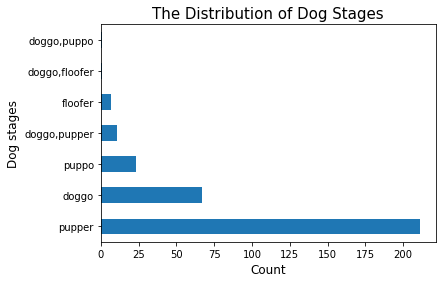

In [75]:
# Lets get the barchart of the distribution of the dog stages
df_combined_2.dog_stage.value_counts().plot(kind='barh')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Dog stages', fontsize=12)
plt.title('The Distribution of Dog Stages', fontsize=15)

From the barchart above, it can be seen that pupper stage had the higest count, followed by doggo. This could be because they pupper are younger and probably more cute, which explains people having them more when compared to other dog stage.


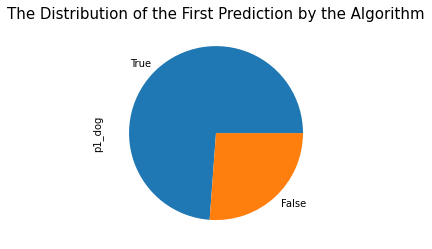

In [76]:
#lets visualize the piechart of the distribution of the first prediction by the algorithm
df_combined_2.p1_dog.value_counts()

percentage_p1_dog = (df_combined_2.p1_dog.value_counts()) / len(df_combined_2.p1_dog)*100
percentage_p1_dog.plot(kind='pie')
plt.title('The Distribution of the First Prediction by the Algorithm', fontsize=15);

from the pie-chart above, it can be seen that a high percentage of the first predictions by the neural network algorithm were True (73.8%).

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The correlation of the Retweet_count and Favorite_count')

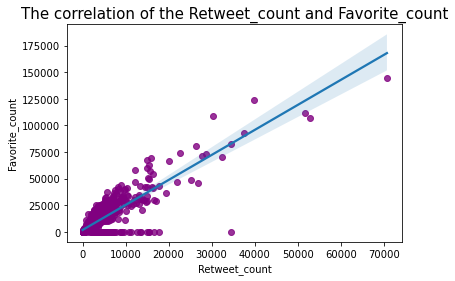

In [77]:
#lets visualize the correlation between Retweet_count and Favorite_count
sns.regplot(df_combined_2.Retweet_count, df_combined_2.Favorite_count, scatter_kws = {'color': 'purple'});
plt.title('The correlation of the Retweet_count and Favorite_count', fontsize=15)

From the graph above, there is a positive linear relationship between retweet_count and favorite_count.